Breast Cancer Data


In [23]:
#Import libraries
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt

import seaborn as sns

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Mondel performance
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report,precision_score,recall_score
from sklearn import metrics


#warnings
import warnings
warnings.simplefilter(action='ignore')

Load Data


In [24]:
df = pd.read_csv("C:/Users/YasmineElSabahElsaye/Desktop/project/data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [25]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [26]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [27]:
df.duplicated().sum()

0

In [28]:


## printing total numbers of Unique value in the dataframe. 
df.nunique()



id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [30]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [31]:
# Drop the "Unnamed: 32" column containing all null values  and id column
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [32]:
df["diagnosis"]

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [33]:
col = list(df.columns)
print(col)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [34]:
col = list(df.columns)
col.remove('diagnosis')
categorical_features = ['diagnosis']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : diagnosis
Numerical Features : radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave points_mean symmetry_mean fractal_dimension_mean radius_se texture_se perimeter_se area_se smoothness_se compactness_se concavity_se concave points_se symmetry_se fractal_dimension_se radius_worst texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave points_worst symmetry_worst fractal_dimension_worst


In [35]:


df["diagnosis"].value_counts()



B    357
M    212
Name: diagnosis, dtype: int64

In [36]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
df['diagnosis'] 

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

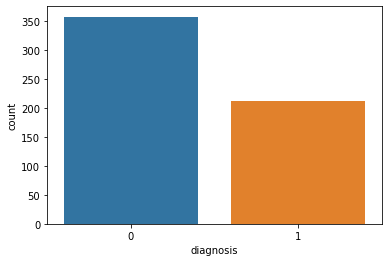

In [37]:
sns.countplot(df['diagnosis'])

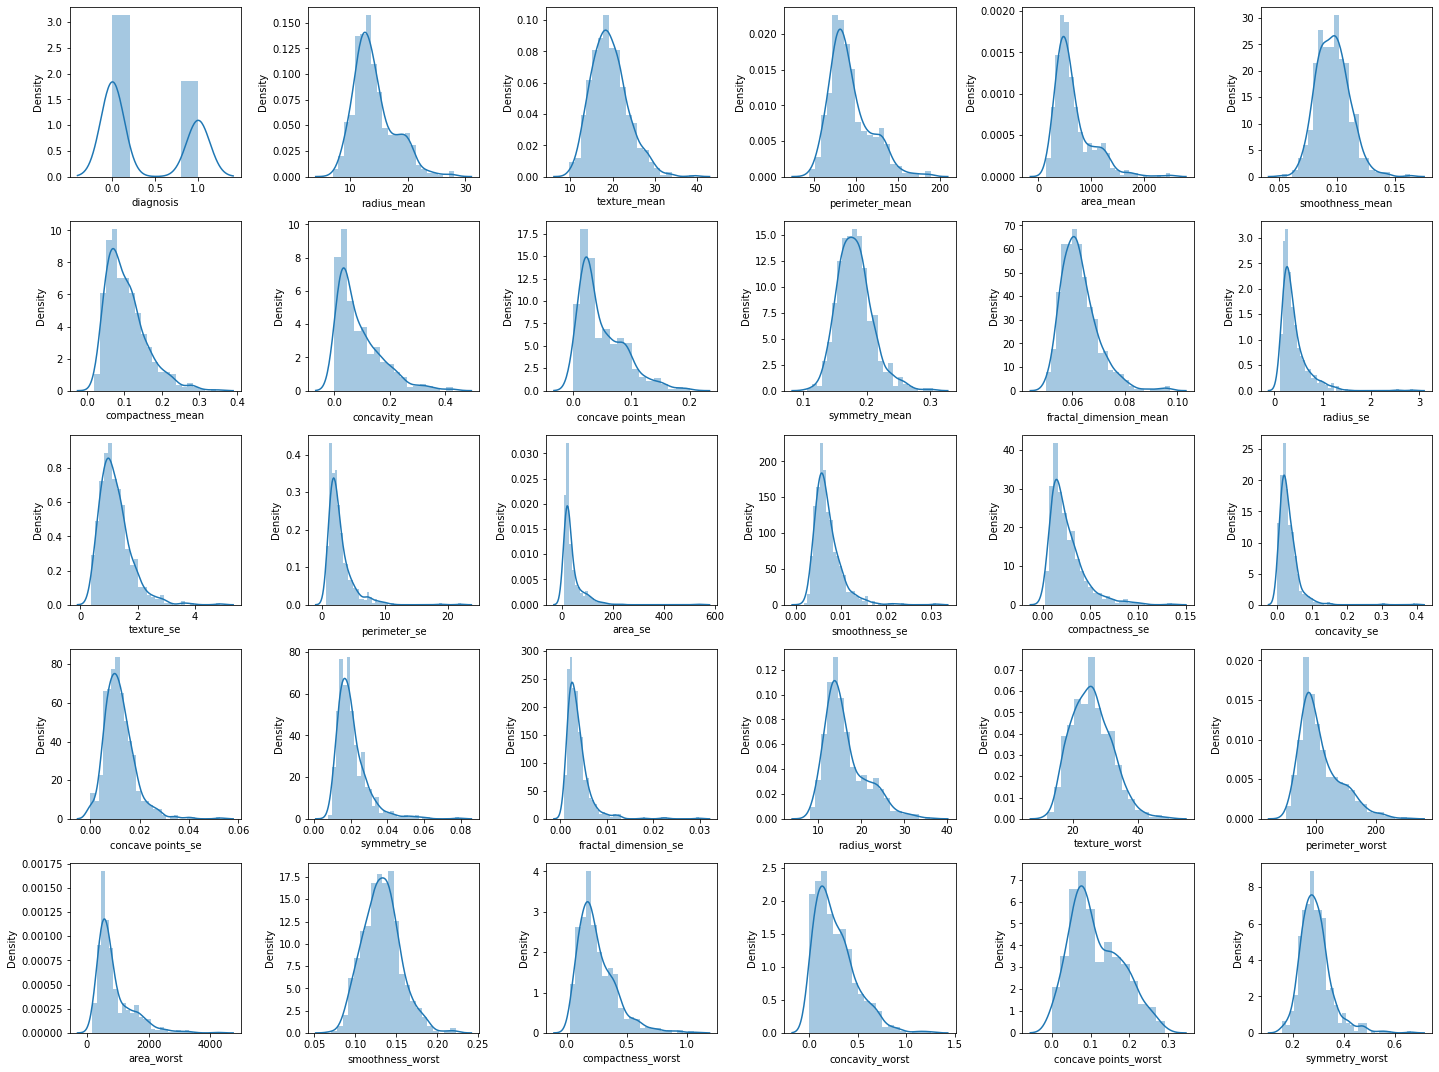

In [38]:
# this code is draw ditrub data in the each col in df
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

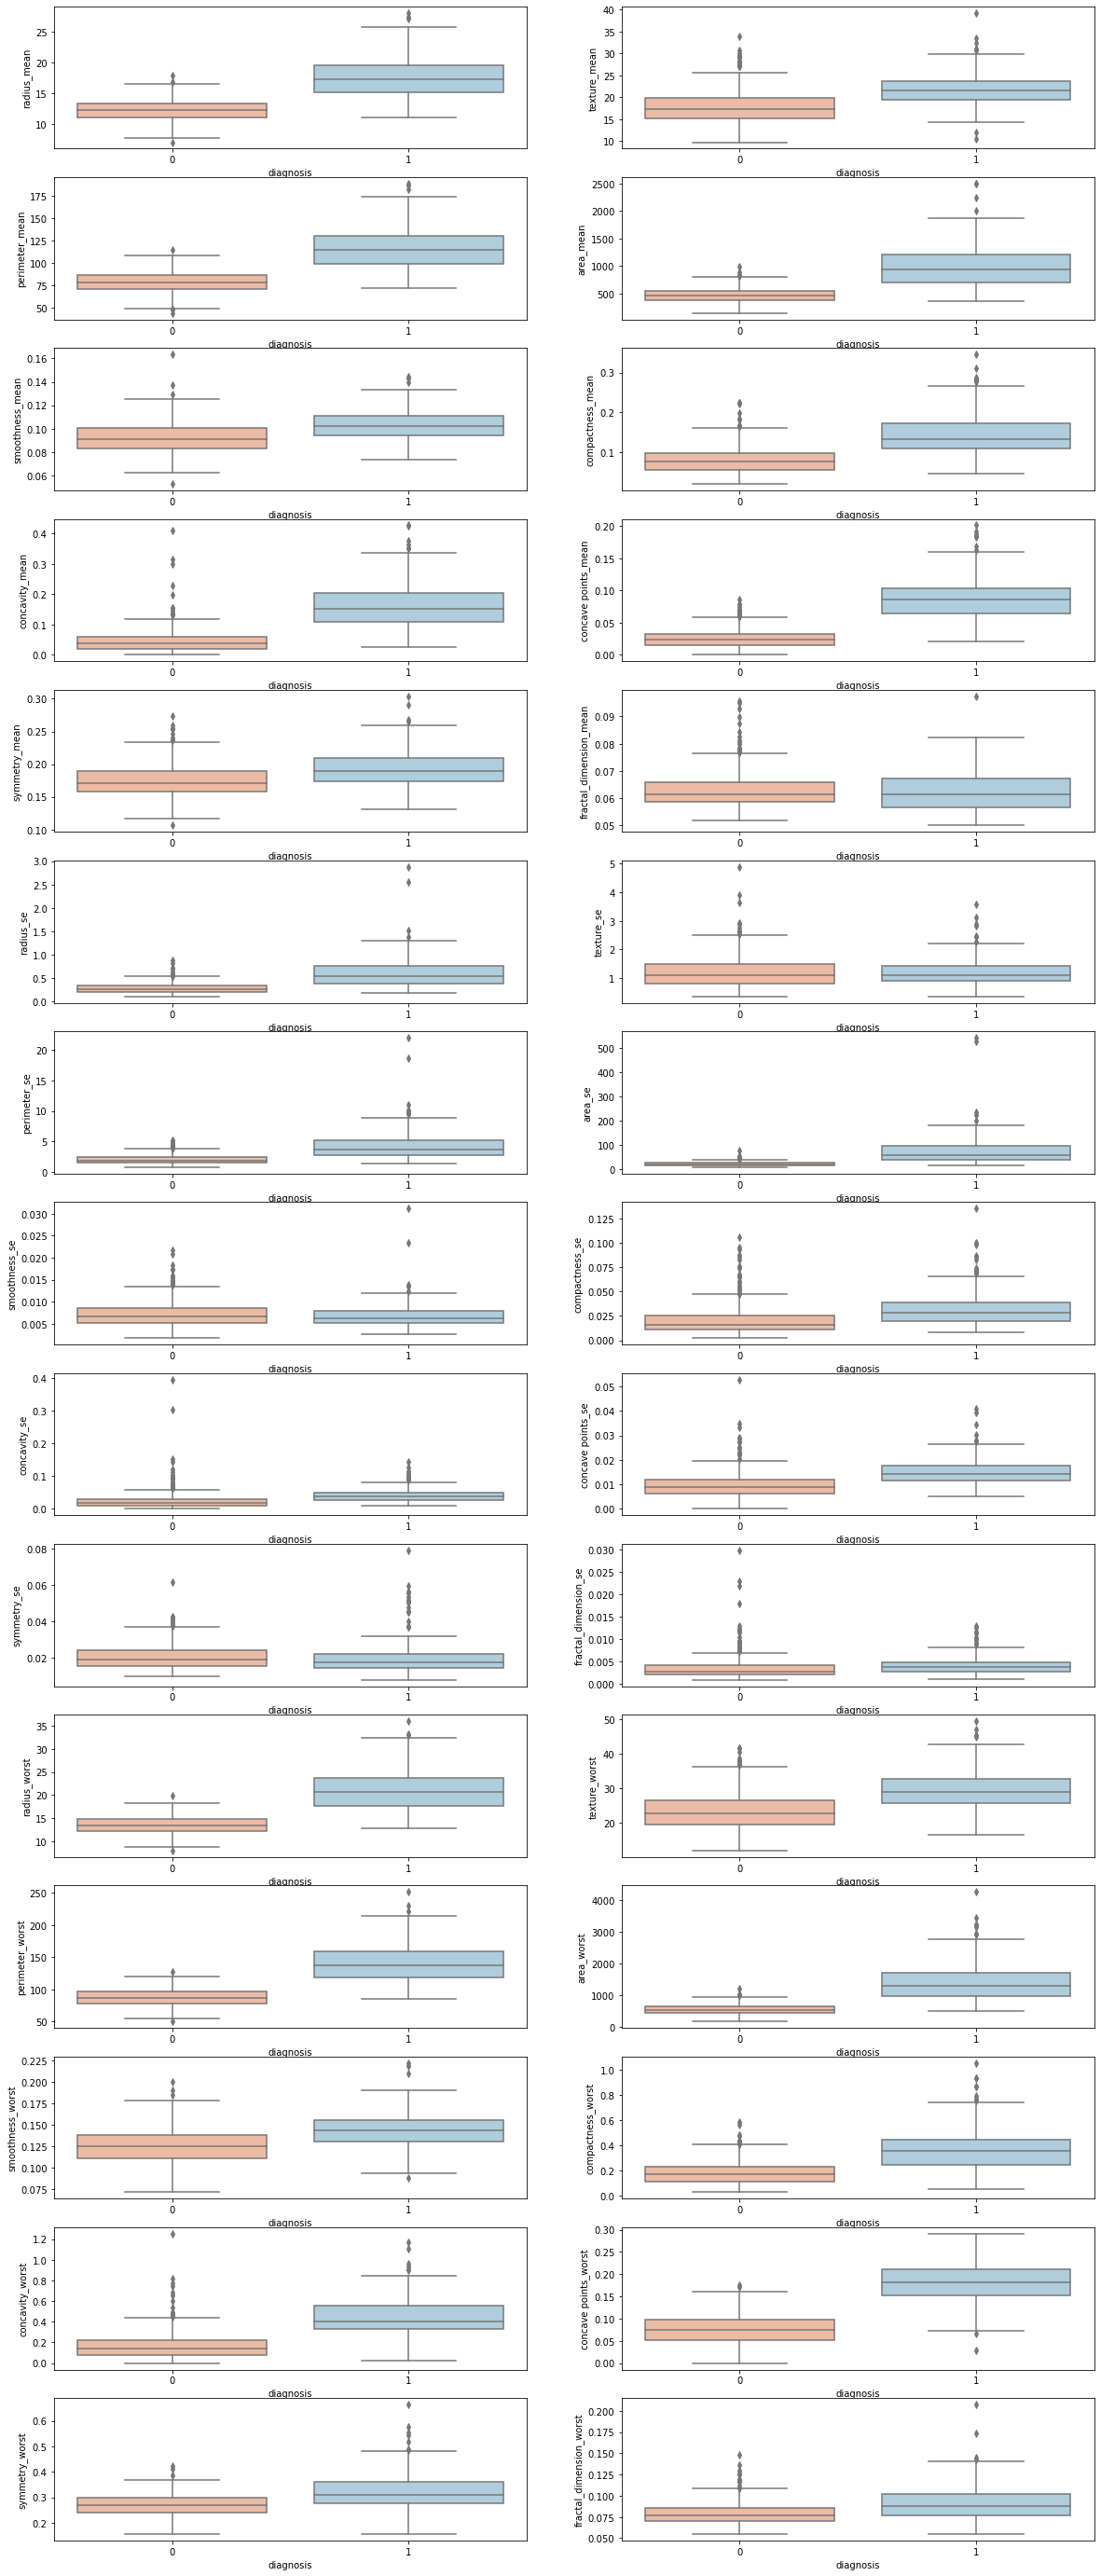

In [39]:
nume_cols=[ 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
           'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se',
           'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
           'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
           'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
           'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

fig=plt.figure(figsize=(20,50))
for i,col in enumerate(nume_cols):
    ax=fig.add_subplot(15,2,i+1)
    sns.boxplot(y=df[col],x=df['diagnosis'], palette = "RdBu")

<AxesSubplot:>

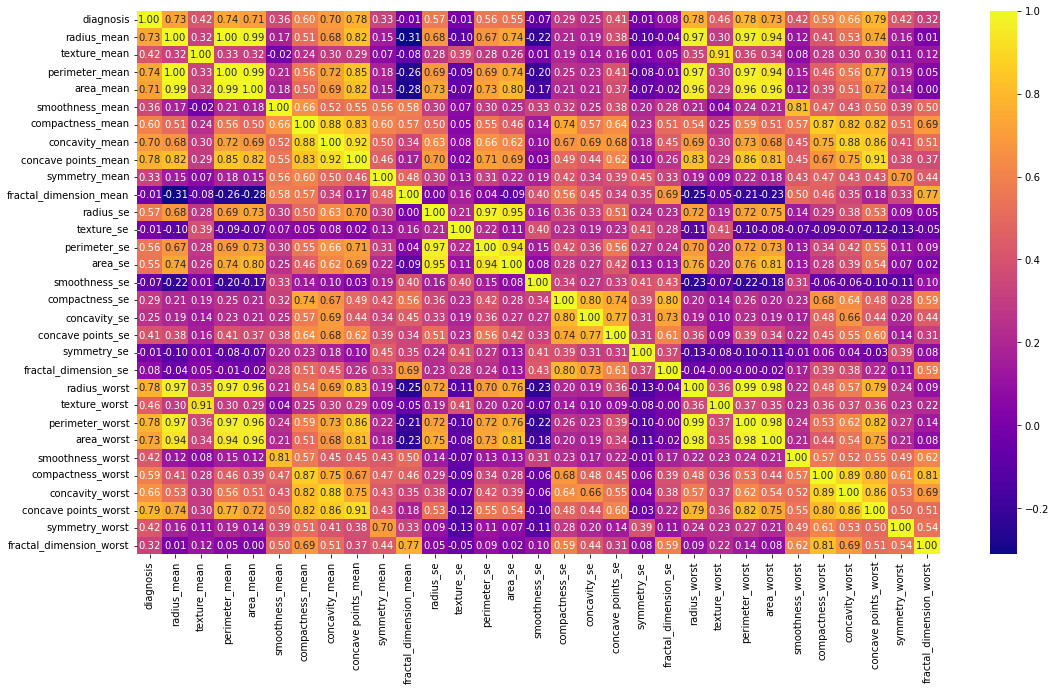

In [40]:


plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), cmap= 'plasma',annot = True , fmt='.2f' )



In [41]:


# checking correlation of independent variable with dependent variable i.e diagnosis
df.corr()['diagnosis'].sort_values(ascending=False)





diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [42]:
# independant variablesx.shape
x=df.drop(["diagnosis"],axis=1)  #independent
y = df["diagnosis"] #depend=target
print('shape of x : {} \nshape of y : {}'.format(x.shape , y.shape))


shape of x : (569, 30) 
shape of y : (569,)


In [43]:
def Report(y_test , y_pred):
    print('Accuracy : {}% \n'.format(accuracy_score(y_test , y_pred)*100))
    print('Confusion Matrix : \n\n{}\n'.format(confusion_matrix(y_test , y_pred)))
    print('Classification Report : \n\n{}'.format(classification_report(y_test , y_pred)))
    
def multi_class_metrics(y_true, y_pred):
    print(f'Accuracy  : ', round(metrics.accuracy_score(y_true, y_pred), 3))
    print(f'Precision : ', round(metrics.precision_score(y_true, y_pred, average = 'micro'), 3))
    print(f'Recall    : ', round(metrics.recall_score(y_true, y_pred, average = 'micro'), 3))
    print(f'f1        : ', round(metrics.f1_score(y_true, y_pred, average = 'micro'), 3)) 

In [44]:
def SVM_Model(x, y, testSize):

    global x_train , x_test , y_train , y_test , y_pred
    
    rows = []
    
    for n in testSize:
        x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = n , random_state = 2)
        
        # Create SVM model
        svc=SVC(kernel='linear') 

        # fit SVM to training set
        svc.fit(x_train,y_train)

        # make predictions on test set
        y_pred=svc.predict(x_test)
            
        dataset = {'Test_size': n, 'acc': metrics.accuracy_score(y_test, y_pred), 'score': svc.score(x, y)}
        rows.append(dataset)
        evaluation3 = pd.DataFrame(rows)            
            
    return (evaluation3)   
# We want to hightlight the maximume values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

NameError: name 'y_test' is not defined

In [ ]:
evaluation = SVM_Model(x, y, [0.1, 0.15, 0.2, 0.25, 0.3])
evaluation.style.apply(highlight_max)

,Test_size,acc,score
0,0.100000,0.982456,0.963093
1,0.150000,0.953488,0.957821
2,0.200000,0.947368,0.964851
3,0.250000,0.951049,0.963093
4,0.300000,0.953216,0.964851


In [ ]:
#split X and y in training and test set in 90:10 ratio
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2,random_state=42)
print('shape of x_train :',x_train.shape)
print('shape of y_train :',y_train.shape)
print('shape of x_test :',x_test.shape)
print('shape of y_test :',y_test.shape)

shape of x_train : (455, 30)
shape of y_train : (455,)
shape of x_test : (114, 30)
shape of y_test : (114,)


In [ ]:


# Create SVM model
svm=SVC(kernel='linear',random_state = 1) 

svm.fit(x_train,y_train)

y_pred=svm.predict(x_test)


In [ ]:
Report(y_test , y_pred)

Accuracy : 95.6140350877193% 

Confusion Matrix : 

[[63  4]
 [ 1 46]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        67
           1       0.92      0.98      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# split data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# creat SVM model
model = SVC(kernel='linear')

# fitting model by data trainig
model.fit(x_train, y_train)

# make a predict by data test
y_pred = model.predict(x_test)


print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
# Report(y_test,y_pred)


Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[70  1]
 [ 4 39]]


In [ ]:
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro")*100)

f1 score is: 95.39245008487592


K-Nearest Neighbour

KNN codenig


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report,precision_score,recall_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=42)

k=23

knn= KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
# accuracy=knn.score(x_test,y_test)
# print("accuracy:",accuracy)

# OR
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)
Report(y_test,y_pred)




accuracy: 0.956140350877193
Accuracy : 95.6140350877193% 

Confusion Matrix : 

[[71  0]
 [ 5 38]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [61]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


X =x
y = y
log = LinearRegression()
log.fit(X, y)

# احسب معامل الانحدار (الميل)
slope =log.coef_[0]
if slope == 0:
    result = "Non_linear"
else:
    result = "Linear"

print(f"Regression coef :{slope}")
print(result)




Regression coef :-0.2630716919250726
Linear


In [48]:
from sklearn.tree import DecisionTreeClassifier

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
detree=DecisionTreeClassifier()
detree.fit(x_train,y_train)
y_pred=detree.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)
Report(y_test,y_pred)



accuracy: 0.945054945054945
Accuracy : 94.5054945054945% 

Confusion Matrix : 

[[54  4]
 [ 1 32]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.89      0.97      0.93        33

    accuracy                           0.95        91
   macro avg       0.94      0.95      0.94        91
weighted avg       0.95      0.95      0.95        91



In [47]:
x,x_test,y,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=2)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
y_pred_train=clf.predict(x_train)
y_pred_val=clf.predict(x_val)

print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_val,y_pred_val))


0.9532967032967034
0.9340659340659341
